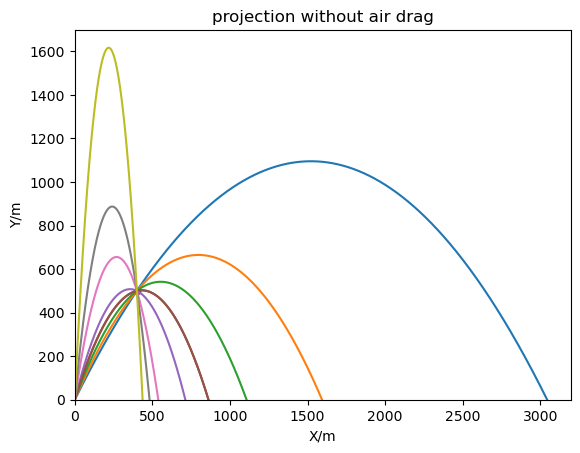

[55.20617257131892, 59.07215339672793, 62.93813422213694, 66.80411504754595, 70.67009587295496, 74.53607669836396, 78.40205752377298, 82.26803834918198, 86.13401917459099] [178.39508894392802, 133.06814631586585, 115.70041818240983, 107.97583806517574, 105.71216463910004, 107.97583806517574, 115.70041818240985, 133.06814631586576, 178.39508894392796]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
def density(Y):
    d_a=0.0065
    T0=300
    d=2.5
    P=(1-(d_a*Y)/T0)**d
    return P
def drag(vx,vy):
    B=0.00004
    v=math.sqrt(vx**2+vy**2)
    fx=-B*vx*v
    fy=-B*vy*v
    return fx,fy
def transform(v,teth):
    a=math.pi/180
    vx=v*math.cos(teth*a)
    vy=v*math.sin(teth*a)
    return vx,vy
def trajectary(Vx0,Vy0):
   t_x=[]
   t_y=[]
   t_Vx=[]
   t_Vy=[]
   t_x.append(0)
   t_y.append(0)
   t_Vx.append(Vx0)
   t_Vy.append(Vy0)
   x=0
   y=0
   tau=0.001
   g=9.8
   B=0.1
   while t_y[-1]>=0:
     V=math.sqrt(t_Vx[-1]**2+t_Vy[-1]**2)
     x=x+t_Vx[-1]*tau
     t_x.append(x)
     y=y+t_Vy[-1]*tau
     t_y.append(y)
     f1,f2=0,0 #drag(t_Vx[-1],t_Vy[-1])
     Vy=t_Vy[-1]-g*tau+f2*density(y)
     t_Vy.append(Vy)
     Vx=t_Vx[-1]+f1*density(y)
     t_Vx.append(Vx)
   return t_x,t_y,t_Vx,t_Vy
def zeropoint(t1,t2):
    yt=-t2[-2]/t2[-1]
    xt=(t1[-2]+yt*t1[-1])/(1+yt)
    t1[-1]=xt
    t2[-1]=0
    return t1,t2
def data(ceth,v):
    XX=[]
    YY=[]
    VVX=[]
    VVY=[]
    for k in v:
        t1,t2=transform(k,ceth)
        a,b,c,d=trajectary(t1,t2)
        e,f=zeropoint(a,b)
        XX.append(e)
        YY.append(f)
        VVX.append(c)
        VVY.append(d)
    return XX,YY,VVX,VVY
def speed(ccet,x0,y0):
    v=[]
    for i in ccet:
        g=i*math.pi/180
        c=abs((x0*math.sin(g)-y0*math.cos(g))*math.cos(g))
        d=math.sqrt(4.9*x0*x0/c)
        v.append(d)
    return v
x0=400.0
y0=500.0
eeth=(math.atan(y0/x0)*180)/math.pi
tau1=(90-eeth)/10
ceta=[]
for j in range(1,10):
    ceta.append(eeth+j*tau1)
v1=speed(ceta,x0,y0)
g=[]
h=[]
b0=[]
n=[]
for i in v1:
    a0=[]
    a0.append(i)
    b=i*1.5
    a0.append(b)
    j=v1.index(i)
    g,h,b0,n=data(ceta[j],a0)
    plt.plot(g[0],h[0])
plt.scatter([x0,],[y0,],20,color='red')
plt.title('projection without air drag')
plt.xlabel('X/m')
plt.ylabel('Y/m') 
plt.xlim(0,)
plt.ylim(0,)
plt.show()    
print(ceta,v1)

29.73679861822409 35.44099595795157 0.03659368586407652
32.90854605937019 25.694025156276673 0.03353999881629832
36.08029350051629 21.442017579957618 0.005396380024672354
39.25204094166239 19.005880001945727 0.0779261118562431
42.423788382808496 17.53757493472913 0.0783651659819995
45.59553582395459 16.678059262303044 0.005443233552281157
48.767283265100694 16.020877181911846 0.0467416624573751
51.9390307062468 15.7020617259918 0.03585626283116028
55.11077814739289 15.545041108731882 0.08788620766384447
58.282525588538995 15.7020617259918 0.05004706570734818
61.4542730296851 16.020877181911846 0.08121134521945628
64.6260204708312 16.678059262303044 0.06329641705815625
67.7977679119773 17.71472215629205 0.049726720405908864
70.9695153531234 19.39177635133734 0.0004934562447971302
74.1412627942695 21.877377390018996 0.0741818626169124
77.31301023541559 26.48052317510033 0.11132415026193243
80.4847576765617 37.26747294745967 0.09527278946082873
83.6565051177078 82.44219983068194 0.0921366

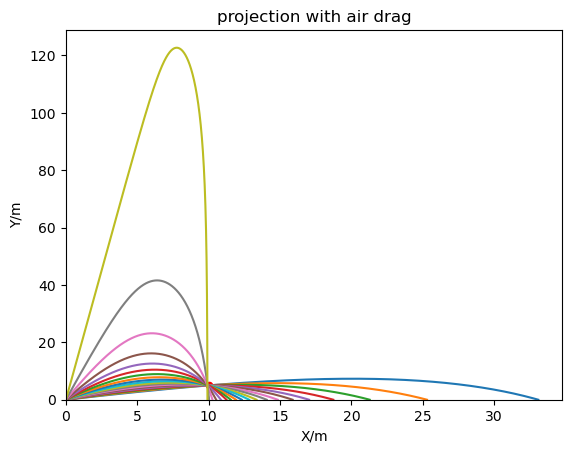

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
def density(Y):
    d_a=0.0065
    T0=300
    d=2.5
    P=(1-(d_a*Y)/T0)**d
    return P
def drag(vx,vy):
    B=0.00004
    v=math.sqrt(vx**2+vy**2)
    fx=-B*vx*v
    fy=-B*vy*v
    return fx,fy
def transform(v,teth):
    a=math.pi/180
    vx=v*math.cos(teth*a)
    vy=v*math.sin(teth*a)
    return vx,vy
def trajectary(Vx0,Vy0):
   t_x=[]
   t_y=[]
   t_Vx=[]
   t_Vy=[]
   t_x.append(0)
   t_y.append(0)
   t_Vx.append(Vx0)
   t_Vy.append(Vy0)
   tau=0.001
   x=0
   y=0
   g=9.8
   B=0.1
   while t_y[-1]>=0:
     V=math.sqrt(t_Vx[-1]**2+t_Vy[-1]**2)
     x=x+t_Vx[-1]*tau
     t_x.append(x)
     y=y+t_Vy[-1]*tau
     t_y.append(y)
     f1,f2=drag(t_Vx[-1],t_Vy[-1])
     Vy=t_Vy[-1]-g*tau+f2*density(y)
     t_Vy.append(Vy)
     Vx=t_Vx[-1]+f1*density(y)
     t_Vx.append(Vx)
   return t_x,t_y,t_Vx,t_Vy
def zeropoint(t1,t2):
    yt=-t2[-2]/t2[-1]
    xt=(t1[-2]+yt*t1[-1])/(1+yt)
    t1[-1]=xt
    t2[-1]=0
    return t1,t2
def data(ceth,v):
        t1,t2=transform(v,ceth)
        a,b,c,d=trajectary(t1,t2)
        e,f=zeropoint(a,b)
        return e,f,c,d
def compare(v_0,ccrf,uu):
    ll=[]
    d=math.sqrt(x0**2+y0**2)
    g,h,b0,n= data(ccrf,v_0)
    for k in range(len(g)):
        c=h[k]/(g[k]+0.0001)
        ll.append(abs(c-uu))
    tt=min(ll)
    j=ll.index(tt)        
    d1=math.sqrt(g[j]**2+h[j]**2)
    if d1>2*d:
       v0=v_0/2.0
       return compare(v0,ccrf,uu)
    elif d1-d>0.1*d:
         v0=v_0*9.0/10.0
         return compare(v0,ccrf,uu)
    elif d1-d>0.01*d:
         v0=v_0*99.0/100.0
         return compare(v0,ccrf,uu)
    elif abs(d1-d)<0.01*d:
         return v_0,abs(d1-d)
    elif d-d1>0.01*d:
         v0=v_0*100.0/99.0
         return compare(v0,ccrf,uu)
    elif d-d1>0.1*d:
         v0=v_0*10.0/9.0
         return compare(v0,ccrf,uu)
    elif d>2*d1:
         v0=v_0*2
         return compare(v0,ccrf,uu)
#x0=input("the target coordinate-X is: ")
#y0=input("the target coordinate-Y is: ")
x0=10
y0=5
dd=int(float(y0))/int(float(x0))
#tau=math.sqrt(x0**2+y0**2)/100
v0=1.0
#cr=input("the angle of emission is: ")
#gh,hk=compare(v0,cr,dd)
#b1,b2,b3,b4=data(cr,gh)
#plt.plot(b1,b2)
#print(hk)
eeth=(math.atan(y0/x0)*180)/math.pi
tau1=(90-eeth)/20
ceta=[]
tt=[]
yy=[]
for j in range(1,20):
    ceta.append(eeth+j*tau1)
for k in ceta:
    gh,hk=compare(v0,k,dd)
    tt.append(gh)
    yy.append(hk)
    b1,b2,b3,b4=data(k,gh)
    plt.plot(b1,b2)
    print (k,gh,hk)
plt.title('projection with air drag')
plt.xlabel('X/m')
plt.ylabel('Y/m')
plt.xlim(0,)
plt.ylim(0,)
plt.scatter([x0,],[y0,],20,color='red')
#plt.show()
#print yy
#plt.plot(ceta,tt)
plt.show()
                            

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
def density(Y):
    d_a=0.0065
    T0=300
    d=2.5
    P=(1-(d_a*Y)/T0)**d
    return P
def drag(vx,vy):
    B=0.00004
    v=int(math.sqrt(vx**2+vy**2))
    fx=-B*vx*v
    fy=-B*vy*v
    return fx,fy
def transform(v,teth):
    a=math.pi/180
    vx=v*math.cos(teth*a)
    vy=v*math.sin(teth*a)
    return vx,vy
def trajectary(Vx0,Vy0):
   t_x=[]
   t_y=[]
   t_Vx=[]
   t_Vy=[]
   t_x.append(0)
   t_y.append(0)
   t_Vx.append(Vx0)
   t_Vy.append(Vy0)
   x=0
   y=0
   #tau=1
   g=9.8
   B=0.1
   while t_y[-1]>=0:
     V=math.sqrt(t_Vx[-1]**2+t_Vy[-1]**2)
     x=x+t_Vx[-1]*tau
     t_x.append(x)
     y=y+t_Vy[-1]*tau
     t_y.append(y)
     f1,f2=drag(t_Vx[-1],t_Vy[-1])
     Vy=t_Vy[-1]-g*tau+f2*density(y)
     t_Vy.append(Vy)
     Vx=t_Vx[-1]+f1*density(y)
     t_Vx.append(Vx)
   return t_x,t_y,t_Vx,t_Vy
def zeropoint(t1,t2):
    yt=-t2[-2]/t2[-1]
    xt=(t1[-2]+yt*t1[-1])/(1+yt)
    t1[-1]=xt
    t2[-1]=0
    return t1,t2
def data(ceth,v):
        t1,t2=transform(v,ceth)
        a,b,c,d=trajectary(t1,t2)
        e,f=zeropoint(a,b)
        return e,f,c,d
def compare(v_0,ccrf,uu):
    ll=[]
    d=math.sqrt(x0**2+y0**2)
    g,h,b0,n= data(ccrf,v_0)
    for k in range(len(g)):
        c=h[k]/(g[k]+0.0001)
        ll.append(abs(c-uu))
    tt=min(ll)
    j=ll.index(tt)        
    d1=math.sqrt(g[j]**2+h[j]**2)
    if d1>2*d:
       v0=v_0/2.0
       return compare(v0,ccrf,uu)
    elif d1-d>0.1*d:
         v0=v_0*9.0/10.0
         return compare(v0,ccrf,uu)
    elif d1-d>0.01*d:
         v0=v_0*99.0/100.0
         return compare(v0,ccrf,uu)
    elif abs(d1-d)<0.01*d:
         return v_0,abs(d1-d)
    elif d-d1>0.01*d:
         v0=v_0*100.0/99.0
         return compare(v0,ccrf,uu)
    elif d-d1>0.1*d:
         v0=v_0*10.0/9.0
         return compare(v0,ccrf,uu)
    elif d>2*d1:
         v0=v_0*2
         return compare(v0,ccrf,uu)
#x0=input("the target coordinate-X is: ")
#y0=input("the target coordinate-Y is: ")
x0=40
y0=50
v0=1.0
dd=y0/x0
cr=input("the angle of emission is: ")
ceta=[]
tau=math.sqrt(x0**2+y0**2)/800.0
tau1=0.01*int(cr)/2
for j in range(0,4):
    ceta.append(0.995*int(cr)+j*tau1)
gh,hk=compare(v0,cr,dd)
speed=[]
we=[]
we2=[]
tau2=0.05*gh/4
for t in range(0,4):
    for k in range(0,4):
        b1,b2,b3,b4=data(ceta[t],0.975*gh+k*tau2)
        plt.plot(b1,b2)
        for u in range(len(b1)):
            c=math.sqrt((b1[u]-x0)**2+(b2[u]-y0)**2)
            we.append(c)
            dt=min(we)
            we2.append(dt)
ak=0
for jj in we2:
    ak=ak+jj
ak=ak/len(we2)
print(ak)
#eeth=(math.atan(y0/x0)*180)/math.pi
#tau1=(90-eeth)/20
#ceta=[]
#tt=[]
#yy=[]
#for j in range(1,20):
#    ceta.append(eeth+j*tau1)
#for k in ceta:
#    gh,hk=compare(v0,k,dd)
#    tt.append(gh)
#    yy.append(hk)
#    b1,b2,b3,b4=data(k,gh)
#    plt.plot(b1,b2)
plt.title('projection with air drag and initial error')
plt.xlabel('X/m')
plt.ylabel('Y/m')
plt.xlim(0,)
plt.ylim(0,)
plt.scatter([x0,],[y0,],60,color='red')
#plt.show()
#print yy
#plt.plot(ceta,tt)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'